In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [14]:
# Make a bar plot of the months in which movies
# with "Christmas" in their title tend to be released in the USA.

rd = release_dates
rd = rd[rd.title.str.contains('Christmas')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index()#.plot(kind='bar')

1      2
2      1
4      1
5      1
6      1
7      1
8      2
9      2
10    14
11    38
12    47
Name: date, dtype: int64

In [17]:
# Make a bar plot of the months in which movies
# whose titles start with "The Hobbit" are released in the USA.

rd = release_dates
rd = rd[rd.title.str.startswith('The Hobbit')]
rd = rd[rd.country == 'USA']
rd
#rd.date.dt.month#.value_counts()#.sort_index().plot(kind='bar')

,title,year,country,date
366386,The Hobbit: An Unexpected Journey,2012,USA,2012-12-14
366451,The Hobbit: The Battle of the Five Armies,2014,USA,2014-12-17
366521,The Hobbit: The Desolation of Smaug,2013,USA,2013-12-13


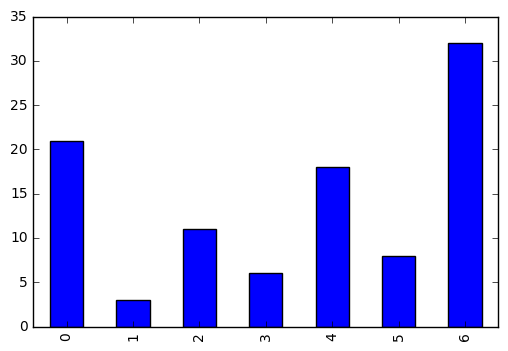

In [7]:
# Make a bar plot of the day of the week on which movies
# with "Romance" in their title tend to be released in the USA.

rd = release_dates
rd = rd[rd.title.str.contains('Romance')]
rd = rd[rd.country == 'USA']
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

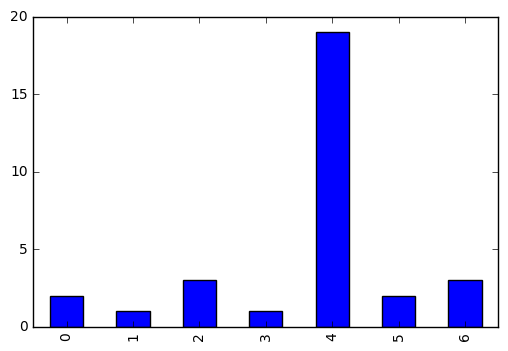

In [8]:
# Make a bar plot of the day of the week on which movies
# with "Action" in their title tend to be released in the USA.

rd = release_dates
rd = rd[rd.title.str.contains('Action')]
rd = rd[rd.country == 'USA']
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

In [9]:
# On which date was each Judi Dench movie from the 1990s released in the USA?

usa = release_dates[release_dates.country == 'USA']

c = cast
c = c[c.name == 'Judi Dench']
c = c[c.year // 10 * 10 == 1990]
c.merge(usa).sort('date')

/Users/cwoodson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


In [21]:
# In which months do films with Judi Dench tend to be released in the USA?

c = cast
c = c[c.name == 'Judi Dench']
m = c.merge(usa).sort('date')
m.date.dt.month#.value_counts().sort_index().plot(kind='bar')

/Users/cwoodson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


2      8
40     7
0      2
1      6
9     11
7     11
13     3
8     12
17    10
37    12
27     1
30     5
36    11
4      1
35     1
11     3
33     6
5     11
10     4
32     6
15     5
25    11
18     2
6      2
3     11
22     1
26    11
21    12
14     4
24     5
12    11
20    12
31     5
28    11
23    11
34     3
29    11
16     9
38     2
39     9
19    11
Name: date, dtype: int64

/Users/cwoodson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


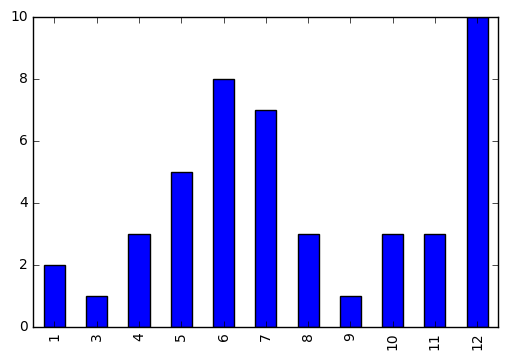

In [11]:
# In which months do films with Tom Cruise tend to be released in the USA?

c = cast
c = c[c.name == 'Tom Cruise']
m = c.merge(usa).sort('date')
m.date.dt.month.value_counts().sort_index().plot(kind='bar')